### Imports

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from terminaltables import AsciiTable

from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

cmap = plt.get_cmap('viridis')

### Load dataset

In [2]:
dataset = pd.read_pickle("data/dataset")

### Display correlation matrix

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


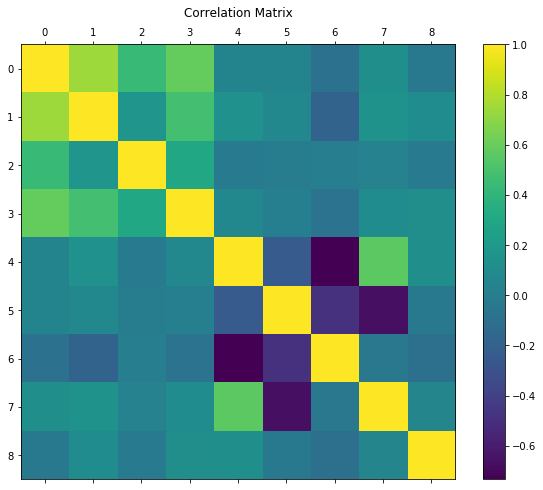

+------+----------------+------------------+
| Num. | Feature        | Blog Correlation |
+------+----------------+------------------+
| 0    | article_length | -0.0306          |
| 1    | blog_tokens    | 0.11242          |
| 2    | news_char_occ  | -0.02905         |
| 3    | blog_char_occ  | 0.12549          |
| 4    | positivity     | 0.12999          |
| 5    | negativity     | -0.0336          |
| 6    | neutral        | -0.09317         |
| 7    | compound       | 0.05463          |
| 8    | blog           | 1.0              |
+------+----------------+------------------+

+----------------+------------------+
| Feature        | Blog Correlation |
+----------------+------------------+
| blog           | 1.00000          |
| positivity     | 0.12999          |
| blog_char_occ  | 0.12549          |
| blog_tokens    | 0.11242          |
| compound       | 0.05463          |
| news_char_occ  | -0.02905         |
| article_length | -0.03060         |
| negativity     | -0.03360       

In [3]:
# Normalize the data
dataset_norm = (dataset - dataset.mean()) / (dataset.max() - dataset.min())

correlation_matrix = dataset_norm.corr().values.round(5)

# Plot the correlation matrix
fig = plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
ax = fig.add_subplot(111)
cax = ax.matshow(dataset_norm.corr(), cmap=cmap, interpolation='nearest')
fig.colorbar(cax)
plt.show()
plt.close()

# Extract the media type feature correlations
target_corr = correlation_matrix[:, -1]

# Show feature table with correlations to 'Blog' articles
table_data = [["Num.", "Feature", "Blog Correlation"]]
for i, col in enumerate(dataset.columns):
    table_data.append([i, col, target_corr[i]])
print (AsciiTable(table_data).table)
print ("")


# Find the features with highest media type correlation
target_highest = np.argsort(target_corr)[::-1]

# Show the feature correlations ordered by amount  
table_data = [["Feature", "Blog Correlation"]]
for i in target_highest:
    table_data.append([dataset.columns[i], "%.5f" % target_corr[i]])
print (AsciiTable(table_data).table)
print ("")


### Compare features between distributions

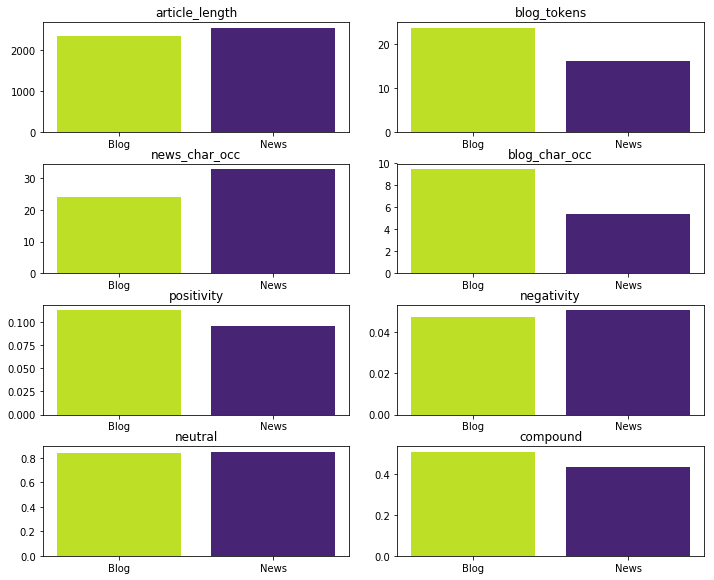

In [4]:

news_articles = dataset[dataset['blog'] == 0].iloc[:, :-1].mean()
blog_articles = dataset[dataset['blog'] == 1].iloc[:, :-1].mean()

feature_names = dataset.columns[:-1]

mean_values = []
for feature_name in feature_names:
    mean_values.append((news_articles[feature_name], blog_articles[feature_name]))
 
colors = [cmap(0.1), cmap(0.9)]

# Plot grid

n_cols = 2
n_rows = int(len(feature_names)/n_cols)

fw, fh = 10, 8
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fw, fh))
fig.tight_layout()
for i in range(n_cols*n_rows):
    subplot = plt.subplot(n_rows, n_cols, i+1)
    subplot.set_title(feature_names[i])
    subplot.bar(("News", "Blog"), mean_values[i], color=colors)  
plt.show()
plt.close()

# If there is a remaining feature => Plot it
if n_cols*n_rows < len(feature_names):
    # Plot the rest
    fig = plt.figure(figsize=(fw, int(fh/n_rows)))
    plt.title(feature_names[i+1])
    plt.bar(("News", "Blog"), mean_values[i+1], color=colors)
    plt.show()
    plt.close()
